In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/premier-league-player-statistics-updated-daily/dataset - 2020-09-24.csv


In [2]:
# required libraries
import missingno as msn
from itertools import repeat
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
from plotly.subplots import make_subplots

pd.set_option('mode.chained_assignment', None)

# Loading and Exploring Dataset

## load the dataset

In [3]:
data = pd.read_csv('../input/premier-league-player-statistics-updated-daily/dataset - 2020-09-24.csv')
data = data.copy()

In [4]:
print('Shape of dataSet : {}'.format(data.shape))
data.head()

Shape of dataSet : (571, 59)


,Name,Jersey Number,Club,Position,Nationality,Age,Appearances,Wins,Losses,Goals,...,Punches,High Claims,Catches,Sweeper clearances,Throw outs,Goal Kicks,Yellow cards,Red cards,Fouls,Offsides
0,Bernd Leno,1.0,Arsenal,Goalkeeper,Germany,28.0,64,28,16,0,...,34.0,26.0,17.0,28.0,375.0,489.0,2,0,0,NaN
1,Matt Macey,33.0,Arsenal,Goalkeeper,England,26.0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,NaN
2,Rúnar Alex Rúnarsson,13.0,Arsenal,Goalkeeper,Iceland,25.0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,NaN
3,Héctor Bellerín,2.0,Arsenal,Defender,Spain,25.0,160,90,37,7,...,NaN,NaN,NaN,NaN,NaN,NaN,23,0,125,8.0
4,Kieran Tierney,3.0,Arsenal,Defender,Scotland,23.0,16,7,5,1,...,NaN,NaN,NaN,NaN,NaN,NaN,2,0,9,0.0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 571 entries, 0 to 570
Data columns (total 59 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Name                    571 non-null    object 
 1   Jersey Number           563 non-null    float64
 2   Club                    571 non-null    object 
 3   Position                571 non-null    object 
 4   Nationality             570 non-null    object 
 5   Age                     570 non-null    float64
 6   Appearances             571 non-null    int64  
 7   Wins                    571 non-null    int64  
 8   Losses                  571 non-null    int64  
 9   Goals                   571 non-null    int64  
 10  Goals per match         309 non-null    float64
 11  Headed goals            502 non-null    float64
 12  Goals with right foot   502 non-null    float64
 13  Goals with left foot    502 non-null    float64
 14  Penalties scored        309 non-null    fl

In [6]:
data.isnull().sum()

Name                        0
Jersey Number               8
Club                        0
Position                    0
Nationality                 1
Age                         1
Appearances                 0
Wins                        0
Losses                      0
Goals                       0
Goals per match           262
Headed goals               69
Goals with right foot      69
Goals with left foot       69
Penalties scored          262
Freekicks scored          262
Shots                     262
Shots on target           262
Shooting accuracy %       262
Hit woodwork               69
Big chances missed        262
Clean sheets              309
Goals conceded            309
Tackles                    69
Tackle success %          181
Last man tackles          378
Blocked shots              69
Interceptions              69
Clearances                 69
Headed Clearance           69
Clearances off line       378
Recoveries                181
Duels won                 181
Duels lost

<Axes: >

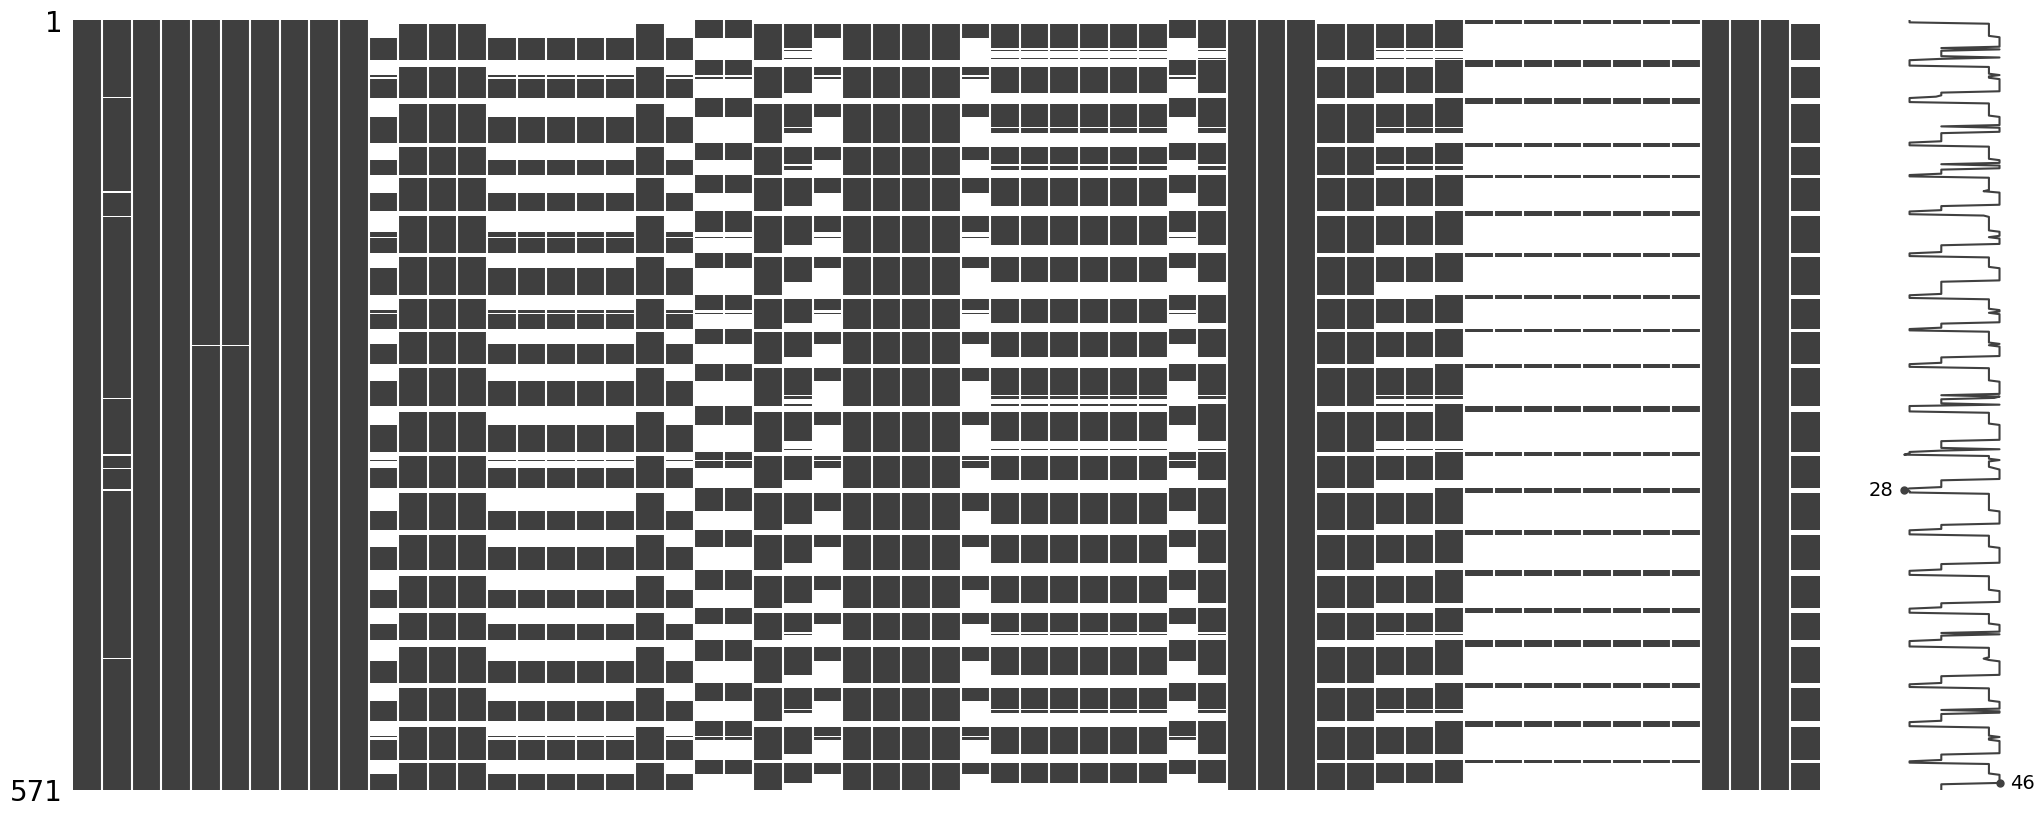

In [7]:
# visualize the missing values across dataset
msn.matrix(data)

## Data pre-processing

In [8]:
# Remove entries which do not have age, jersey number and nationality
data = data[data['Nationality'].notna()]
data = data[data['Age'].notna()]
data = data[data['Jersey Number'].notna()]

# cleaning the percentage sign
data['Cross accuracy %'] = data['Cross accuracy %'].astype(str).str.replace(r'%', '').astype(float)
data['Shooting accuracy %'] = data['Shooting accuracy %'].astype(str).str.replace(r'%', '').astype(float)
data['Tackle success %'] = data['Tackle success %'].astype(str).str.replace(r'%', '').astype(float)

features = data.columns
data_clean = data[features]
data_clean.head()



,Name,Jersey Number,Club,Position,Nationality,Age,Appearances,Wins,Losses,Goals,...,Punches,High Claims,Catches,Sweeper clearances,Throw outs,Goal Kicks,Yellow cards,Red cards,Fouls,Offsides
0,Bernd Leno,1.0,Arsenal,Goalkeeper,Germany,28.0,64,28,16,0,...,34.0,26.0,17.0,28.0,375.0,489.0,2,0,0,NaN
1,Matt Macey,33.0,Arsenal,Goalkeeper,England,26.0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,NaN
2,Rúnar Alex Rúnarsson,13.0,Arsenal,Goalkeeper,Iceland,25.0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,NaN
3,Héctor Bellerín,2.0,Arsenal,Defender,Spain,25.0,160,90,37,7,...,NaN,NaN,NaN,NaN,NaN,NaN,23,0,125,8.0
4,Kieran Tierney,3.0,Arsenal,Defender,Scotland,23.0,16,7,5,1,...,NaN,NaN,NaN,NaN,NaN,NaN,2,0,9,0.0


In [9]:
data_clean_appNonZero = data_clean[data_clean['Appearances'] > 0]
# prevents division by zero for players yet to make appearances

# take care off the data type for division
# separate cols with dtype objects and cols that may not be divided by appearances

cols = features.drop(['Age', 'Name', 'Appearances', 'Club', 'Nationality', 'Jersey Number', 'Cross accuracy %', 'Position', 'Goals per match','Passes per match','Tackle success %', 'Shooting accuracy %'])
data_clean_appNonZero.loc[:, cols] = data_clean_appNonZero.loc[:, cols].div(data_clean_appNonZero['Appearances'], axis=0)



/tmp/ipykernel_18/2390248074.py:8: FutureWarning:

Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0.4375     0.5625     0.4375     0.47727273 0.6097561  0.52525253
 0.3381295  0.58247423 0.51282051 1.         0.54347826 0.44444444
 0.48148148 0.61702128 0.36363636 0.42105263 0.         0.53030303
 0.39285714 0.53846154 0.46464646 0.49425287 0.45454545 0.5
 0.52173913 0.21428571 0.58050847 0.29310345 0.         0.14285714
 0.5625     0.33103448 0.30769231 0.33333333 0.17647059 0.28
 0.26229508 0.16666667 0.25490196 1.         0.27027027 0.24137931
 0.30769231 0.23943662 0.24137931 0.28571429 0.25714286 0.20588235
 0.2        0.28571429 0.21052632 1.         0.24107143 0.5
 0.36363636 0.25       0.24242424 0.25       0.25       0.24242424
 0.25       0.33333333 0.21505376 0.49494949 0.22826087 0.24
 0.28571429 0.21212121 0.25641026 0.25806452 0.27659574 0.30769231
 0.19230769 0.37837838 1.         0.28488372 0.31081081 0.3902439
 0

In [10]:
# positional classification, data as is
goalies = data[data['Position'] == 'Goalkeeper']
defenders = data[data['Position'] == 'Defender']
midfielders = data[data['Position'] == 'Midfielder']
forwards = data[data['Position'] == 'Forward']

# players who have made atleast 38 games ( a season worth games)
# data as is
data_38app = data[data['Appearances'] >= 38]
goalies_38app = goalies[goalies['Appearances'] >= 38]
defenders_38app = defenders[defenders['Appearances'] >= 38] 
midfielders_38app = midfielders[midfielders['Appearances'] >= 38]
forwards_38app = forwards[forwards['Appearances'] >= 38]

# players who have made atleast 38 games
# data normalized
all_players = data_clean_appNonZero[data_clean_appNonZero['Appearances']>=38]
goalies_ = data_clean_appNonZero[(data_clean_appNonZero['Position'] == 'Goalkeeper') & (data_clean_appNonZero['Appearances'] >= 38)]
defenders_ = data_clean_appNonZero[(data_clean_appNonZero['Position'] == 'Defender') & (data_clean_appNonZero['Appearances'] >= 38)]
midfielders_ = data_clean_appNonZero[(data_clean_appNonZero['Position'] == 'Midfielder') & (data_clean_appNonZero['Appearances'] >= 38)]
forwards_ = data_clean_appNonZero[(data_clean_appNonZero['Position'] == 'Forward') & (data_clean_appNonZero['Appearances'] >= 38)]

# General Stats

## Contries most represented in EPL

In [11]:
df = data
fig = px.pie(df, values='Appearances', names='Nationality', title='Countries represented in EPL by number of appearances')
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.update_layout(title_text='<b>No of appearances per country</b>', title_x = 0.5, titlefont=dict(color='black', size=28, family="Courier New, monospace"), width=600, height=600, showlegend=False)
iplot(fig)

In [12]:
fig = px.sunburst(df, path=['Position', 'Nationality'], values='Appearances')
fig.update_layout(title_text='<b>Players position by country</b>', title_x=0.5, titlefont=dict(color='black', size=28, family="Couries New, monospace"), width=600, height=600, showlegend=False)
iplot(fig)

Summary ( countries other the England as its homeground for them )
- Overall : France > Spain > Brazil
- GoalKeepers : Spain > Denmark > France
-  Defenders : Spain > Netherlands > Ireland
- MidFielders : Scotland > France > Spain
- Forwards : Brazil > France > Ireland

## Players Appearances ( number of games) 

In [13]:
fig = px.bar(df, x = 'Position', y = 'Appearances', color = 'Club', hover_data=['Name'], width=750, height=600)
fig.update_layout(template='ggplot2', title='<b>Players appearances by position</b>', titlefont=dict(size=24))
iplot(fig)

/opt/conda/lib/python3.10/site-packages/plotly/express/_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



Summary :
- GoalKeeper : Joe Hart, 340, Tottenham-Hotspur
- Defender : Garg  Cahill, 374, Crystal-Palace
- Midfielder : James Milner, 539, Liverpool
- Forward : Theo Walcott, 346, Everton

In [14]:
fig = px.bar(df, x = 'Appearances', y = 'Club', color='Position', hover_data=['Name'], width=750, height=600)
fig.update_layout(template='ggplot2', title='<b>Appearances by Club</b>', titlefont=dict(size=24))
iplot(fig)

/opt/conda/lib/python3.10/site-packages/plotly/express/_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



## Player's Age

In [15]:
age_avg = df['Age'].mean()
fig = px.violin(df, x = 'Position', y = 'Age', box = True, title='<b>Players Age distribution by position ( average age dotted line )</b>', width=600, height=400, template='simple_white')
fig.add_shape(type="line", line_color="blue", line_width=3, opacity=1, line_dash="dot", x0=0, x1=1, xref="paper", y0=age_avg, y1=age_avg, yref="y")
iplot(fig)

In [16]:
fig = px.box(df, x = 'Age', y = 'Club', title='<b>Players age distribution by club ( average age dotted line )</b>', width=750, height=750, template='ggplot2')
fig.add_shape(type="line", line_color="black", line_width=3, opacity=1, line_dash="dot", y0=0, y1=1, yref="paper", x0=age_avg, x1=age_avg, xref="x")
iplot(fig)

# Players Stats by playing position

## GoalKeepers

Qualities on which goalkeepers are analyzed :
- Clean sheets
- Saves
- Penalties
- Punches
- Punches
- High Claims
- Catches

In [17]:
get_rows = 5
df_1=goalies_38app.sort_values(by='Clean sheets', ascending=False).head(get_rows)
df_2=goalies_38app.sort_values(by='Saves', ascending=False).head(get_rows)
df_3=goalies_38app.sort_values(by='High Claims', ascending=False).head(get_rows)
df_4=goalies_38app.sort_values(by='Catches', ascending=False).head(get_rows)

In [18]:
df_11 = goalies_.sort_values(by='Clean sheets', ascending=False).head(get_rows)
df_12 = goalies_.sort_values(by='Saves', ascending=False).head(get_rows)
df_13 = goalies_.sort_values(by='High Claims', ascending=False).head(get_rows)
df_14 = goalies_.sort_values(by='Catches', ascending=False).head(get_rows)

In [19]:
fig = make_subplots(rows=4, cols=2, subplot_titles=('Clean sheets(overall)', 'Clean sheets(per game)', 'Saves (overall)', 'Saves (per game)', 'High Claims (overall)', 'High Claims (per game)', 'Catches (overall)', 'Catches(per games)'), horizontal_spacing=0.12, vertical_spacing=.075)

fig.add_trace(go.Bar(x = df_1["Clean sheets"], y=df_1["Name"], hovertext=df_1["Club"], orientation='h'), row = 1, col = 1)
fig.add_trace(go.Bar(x = df_2["Saves"], y=df_2["Name"], hovertext=df_2["Club"], orientation='h'), row = 2, col = 1)
fig.add_trace(go.Bar(x = df_3["High Claims"], y=df_3["Name"], hovertext=df_3["Club"], orientation='h'), row = 3, col = 1)
fig.add_trace(go.Bar(x = df_4["Catches"], y=df_4["Name"], hovertext=df_4["Club"], orientation='h'), row = 4, col = 1)

fig.add_trace(go.Bar(x = df_11["Clean sheets"], y=df_11["Name"], hovertext=df_11["Club"], orientation='h'), row = 1, col = 2)
fig.add_trace(go.Bar(x = df_12["Saves"], y=df_12["Name"], hovertext=df_12["Club"], orientation='h'), row = 2, col = 2)
fig.add_trace(go.Bar(x = df_13["High Claims"], y=df_13["Name"], hovertext=df_13["Club"], orientation='h'), row = 3, col = 2)
fig.add_trace(go.Bar(x = df_14["Catches"], y=df_14["Name"], hovertext=df_14["Club"], orientation='h'), row = 4, col = 2)

fig.update_traces(marker_color=['rgb(110,102,250)', 'rgb(210,202,82)', 'rgb(210, 202, 82)', 'rgb(210,202,82)', 'rgb(210, 202, 82)'], marker_line_color='rgb(8,48,107)', marker_line_width=2.5, opacity=0.6)

fig.update_layout(title_text='<b>Top goalkeepers stats</>', titlefont=dict(size=28), title_x=0.5, showlegend=False, autosize=False, width=1300, height=1200, template='ggplot2', paper_bgcolor='lightgray')
fig.show()

## Defenderes

In [20]:
defenders_attr = ['Blocked shots', 'Interceptions', 'Clearances', 'Headed Clearance', 'Clearances off line', 'Duels won', 'Successful 50/50s', 'Aerial battles won']
top=5
fig = make_subplots(rows=5, cols=2, horizontal_spacing=0.05, vertical_spacing=0.075, subplot_titles=('Blocked shots (overall)', 'Blocked shots (per game)', 'Interceptions (overall)', 'Interceptions (per game)', 'Clearances (overall)', 'Clearances (per game)', 'Headed Clearances(per game)', 'Clearances off line (overall)', 'Clearances off line (per game)'))

df = defenders_38app.sort_values(by='Blocked shots', ascending=False).head(top)
fig.add_trace(go.Bar(x=df["Name"], y=df["Blocked shots"], orientation='v'), row=1, col=1)

df = defenders_38app.sort_values(by='Interceptions', ascending=False).head(top)
fig.add_trace(go.Bar(x=df["Name"], y=df["Interceptions"], orientation='v'), row=2, col=1)

df = defenders_38app.sort_values(by='Clearances', ascending=False).head(top)
fig.add_trace(go.Bar(x=df["Name"], y=df["Clearances"], orientation='v'), row=3, col=1)

df = defenders_38app.sort_values(by='Headed Clearance', ascending=False).head(top)
fig.add_trace(go.Bar(x=df["Name"], y=df["Headed Clearance"], orientation='v'), row=4, col=1)

df = defenders_38app.sort_values(by='Clearances off line', ascending=False).head(top)
fig.add_trace(go.Bar(x=df["Name"], y=df["Clearances off line"], orientation='v'), row=5, col=1)


df = defenders_.sort_values(by='Blocked shots', ascending=False).head(top)
fig.add_trace(go.Bar(x=df["Name"], y=df["Blocked shots"], orientation='v'), row=1, col=2)

df = defenders_.sort_values(by='Interceptions', ascending=False).head(top)
fig.add_trace(go.Bar(x=df["Name"], y=df["Interceptions"], orientation='v'), row=2, col=2)

df = defenders_.sort_values(by='Clearances', ascending=False).head(top)
fig.add_trace(go.Bar(x=df["Name"], y=df["Clearances"], orientation='v'), row=3, col=2)

df = defenders_.sort_values(by='Headed Clearance', ascending=False).head(top)
fig.add_trace(go.Bar(x=df["Name"], y=df["Headed Clearance"], orientation='v'), row=4, col=2)

df = defenders_.sort_values(by='Clearances off line', ascending=False).head(top)
fig.add_trace(go.Bar(x=df["Name"], y=df["Clearances off line"], orientation='v'), row=5, col=2)

fig.update_traces(marker_color=['rgb(96,96,96)', 'rgb(210,202,82)', 'rgb(210,202,82)', 'rgb(210,202,82)', 'rgb(210,202,82)', 'rgb(210,202,82)'], marker_line_color='rgb(8,48,107)', marker_line_width=2.5, opacity=0.6)
fig.update_layout(title_text='<b>Top Defender Qualities</b>', titlefont=dict(size=28), title_x=0.5, showlegend=False, autosize=False, width=1300, height=1300, template='ggplot2', paper_bgcolor='lightgray')

fig.show()

## Midfielders

In [21]:
midfielders_['Recoveries'].head()

13    4.228261
14    5.190476
15    4.129630
16    4.489362
18    4.982456
Name: Recoveries, dtype: float64

In [22]:
mid_field_attr = ['Recoveries', 'Duels won', 'Successful 50/50s', 'Aerial battles won']

col = 2
row = 4

top = 5

fig = make_subplots(rows = 4, cols = 2, subplot_titles=('Recoveries(overall)' , 'Recoveries(per game)', 'Duels Won (overall)', 'Duels Won (per game)', 'Successful 50/50s (overall)', 'Successful 50/50s', 'Aerial battles won (overall)', 'Aerial battle won (per game)'))

for i, attr in enumerate(mid_field_attr):
    df = data_38app[data_38app["Position"] == 'Midfielder'].sort_values(by=attr, ascending=False).head(top)
    fig.add_trace(go.Bar(x=df['Name'], y = df[attr], orientation='v'), row=i+1, col=1)
    
for j, attr in enumerate(mid_field_attr):
    df = midfielders_.sort_values(by=attr, ascending=False).head(top)
    fig.add_trace(go.Bar(x=df['Name'], y=df[attr], orientation='v'), row=j+1, col=2)
    fig.update_traces(marker_color=['rgb(96, 96, 96)','rgb(110,202,82)','rgb(110,202,82)','rgb(110,202,82)','rgb(110,202,82)', 'rgb(110,202,82)'], marker_line_color='rgb(8,48,107)',marker_line_width=2.5, opacity=0.6)

fig.update_layout(title_text='<b>Top Midfield Qualities: Defense Ability<b>',titlefont=dict(size=28, family='Courier'),title_x=0.5,showlegend=False,autosize=False, width=1200, height=1200, template='ggplot2', paper_bgcolor='lightgray')
iplot(fig)

In [23]:
mid_field_attr = ['Assists', 'Big chances created', 'Cross accuracy %', 'Through balls']

top=5
fig = make_subplots( rows=4, cols=2, subplot_titles=('Assists (overall)', 'Assists (per game)', 'Big chances created (overall)', 'Big chances created (per game)', 'Cross accuracy %(overall)', 'Cross accuracy %(per game)' , 'Through balls (overall)', 'Through balls (per game)'))

for i , attr in enumerate(mid_field_attr):
    df = data_38app[data_38app['Position'] == 'Midfielder'].sort_values(by = attr, ascending=False).head(top)
    fig.add_trace(go.Bar(x=df['Name'], y = df[attr], orientation='v'), row=i+1, col=1)
    
for i , attr in enumerate(mid_field_attr):
    df = midfielders_.sort_values(by = attr, ascending=False).head(top)
    fig.add_trace(go.Bar(x=df['Name'], y = df[attr], orientation='v'), row=i+1, col=2)
    
fig.update_traces(marker_color= ['rgb(255,208,288)', 'rgb(100,100,100)', 'rgb(100,100,100)', 'rgb(100,100,100)', 'rgb(100,100,100)', 'rgb(100,100,100)'], marker_line_color='rgb(8,48,107)', marker_line_width=2.5, opacity=0.6)
fig.update_layout(title_text='<b>Top MidField Qualities: Creative Ability</b>', titlefont=dict(size=28, family='Courier'), title_x=0.5, showlegend=False, autosize=False, width=1200, height=1200, template='ggplot2', paper_bgcolor='lightgray')

iplot(fig)

## Forwards

In [24]:
headerColor='grey'
rowEvenColor='lightgrey'
rowOddColor = 'white'

head = 10
table_header = ['Rank', 'Total goals','Goals with right foot', 'Goals with left foot', 'Headed goals']
df = data_38app

fig = go.Figure(data=[go.Table(
    header=dict(values=list(table_header),
                line_color='darkslategrey', fill_color=headerColor, align=['left'], font=dict(color='white', size=20) ,height=30
               ), cells=dict(values=[list(np.arange(1, head+1)), 
                                     data_38app.sort_values(by ='Goals', ascending=False)['Name'].head(head), 
                                     data_38app.sort_values(by='Goals with right foot', ascending= False).head(head),
                                     data_38app.sort_values(by='Goals with left foot', ascending=False).head(head),
                                     data_38app.sort_values(by ='Headed goals', ascending=False).head(head)
                                    ],
                            fill_color=[[rowOddColor, rowEvenColor]*5],
                            font=dict(color='black', size=16, family="Courier new, monospace"),
                            align='left', height=25 
                            )
                        )
                     ]
               )

fig.update_layout(title_text='TOP {} GOAL SCORERS'.format(head), title_x=0.5, font=dict(color='white', size=20, family='Courier New, monospace'))
fig.update_layout(width=1200, height=550, template='plotly_dark')
fig.show()

In [25]:
fig=px.pie(data, values='Goals', names='Nationality', title='<b>Player of which country score the most, goals</b>' , width=550, height=550)

fig.update_traces(textposition='inside', textinfo='percent+label',showlegend=False)
iplot(fig)

In [26]:
headedGoals_forward = data[data['Position'] == 'Forward']['Headed goals'].sum()
headedGoals_midfielder = data[data['Position'] == 'Midfielder']['Headed goals'].sum()
headedGoals_defender = data[data['Position'] == 'Defender']['Headed goals'].sum()
headedGoals_goalkeeper = data[data['Position'] == 'Goalkeeper']['Headed goals'].sum()

rightFootGoal_forward = data[data['Position']=='Forward']['Goals with right foot'].sum()
rightFootGoal_midfielder = data[data['Position']=='Midfielder']['Goals with right foot'].sum()
rightFootGoal_defender = data[data['Position']=='Defender']['Goals with right foot'].sum()
rightFootGoal_goalkeeper = data[data['Position']=='GoalKeeper']['Goals with right foot'].sum()

leftFootGoal_forward = data[data['Position']=='Forward']['Goals with left foot'].sum()
leftFootGoal_midfielder = data[data['Position']=='Midfielder']['Goals with left foot'].sum()
leftFootGoal_defender = data[data['Position']=='Defender']['Goals with left foot'].sum()
leftFootGoal_goalkeeper = data[data['Position']=='GoalKeeper']['Goals with left foot'].sum()



# Other Stats

## Goals distribution

In [27]:
fig = go.Figure()

fig.add_trace(go.Bar(x=data['Club'], y=data['Goals with right foot'], name = 'Right foot goals', marker_color='indianred'))
fig.add_trace(go.Bar(x=data['Club'], y=data['Goals with left foot'], name='Left foot goals', marker_color='lightsalmon'))
fig.add_trace(go.Bar(x=data['Club'], y=data['Headed goals'], name = 'Headers', marker_color='lightseagreen'))

fig.update_layout(barmode='group')

fig.update_layout(title_text="<b>Goal distribution by club</b", titlefont=dict(size=24, family='Countrier'), width=750, height=500, template='simple_white')

iplot(fig)

In [28]:
df = data
fig= px.sunburst(df, path=['Position','Club'], values='Headed goals')
fig.update_layout(title_text="<b>Headed goals (club, position)</b>", titlefont=dict(size=24), width=500, height=500)

iplot(fig)

In [29]:
fig = px.sunburst(df, path=['Position', 'Club'], values='Goals with left foot')
fig.update_layout(title_text='<b>Left foot goals (club, position) </b>', titlefont=dict(size=24), width=500, height=500)
iplot(fig)

In [30]:
fig = px.sunburst(df, path=['Position', 'Club'],values='Goals with right foot')
fig.update_layout(title_text='<b>Right footed goals (Club , position) </b>', titlefont=dict(size=24), width=500, height=500)

iplot(fig)

In [31]:
goals_groupedby_clubs = data.groupby(['Club']).agg({'Goals with left foot':sum, 'Goals with right foot':sum , 'Headed goals':sum})

all_nodes = ['Forwards', 'Midfielders', 'Defenders', 'Right foot goals', 'Left foot goals', 'Headed goals',
           'Arsenal', 'Aston-Villa', 'Brighton-and-Hove-Albion', 'Burnley',
           'Chelsea', 'Crystal-Palace', 'Everton', 'Fulham', 'Leeds-United',
           'Leicester-City', 'Liverpool', 'Manchester-City', 'Manchester-United',
           'Newcastle-United', 'Sheffield-United', 'Southampton',
           'Tottenham-Hotspur', 'West-Bromwich-Albion', 'West-Ham-United',
           'Wolverhampton-Wanderers']

list_1 = [0, 1, 2]
list_2 = [3, 4, 5]
source = 3*list_1 + 20*list_2

target = []
for t in range(3, 26):
    target.extend(repeat(t, 3))

R = goals_groupedby_clubs['Goals with right foot'].values
L = goals_groupedby_clubs['Goals with left foot'].values
H = goals_groupedby_clubs['Headed goals'].values

goals_scored = []
for i in range(len(R)):
    goals_scored.append(R[i])
    goals_scored.append(L[i])
    goals_scored.append(H[i])
    
value = [rightFootGoal_forward, rightFootGoal_midfielder, rightFootGoal_defender, leftFootGoal_forward, leftFootGoal_midfielder, leftFootGoal_defender, headedGoals_forward, headedGoals_midfielder, headedGoals_defender] + goals_scored

fig = go.Figure(
            data = [go.Sankey(node=dict(pad=2, thickness=75, line=dict(color="gray", width=0.75), label=all_nodes, color=['#67AEE1', '#ff6e4a', '#48bf91'] +3*['gold'] + 20*['#babad4']), 
                             link=dict(source=source, target=target, value=value, color = 26*['#94C6EA', '#ffb6a4', '#a3dfc8']))]

)

fig.update_layout(title_text="<b>Distribution of goals: </b>"\
                 '<br><span style="font-size:16px;color: darkgray"> By player position , club and part-of-body scored by', titlefont=dict(size=28, family='Courier'))

fig.update_traces(textfont_family='Courier', selector=dict(type='sankey'))

iplot(fig)


/tmp/ipykernel_18/486274865.py:1: FutureWarning:

The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.

/tmp/ipykernel_18/486274865.py:1: FutureWarning:

The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.



## Unwanted records

In [32]:
unwanted_records = ['Losses', 'Big chances missed', 'Own goals', 'Errors leading to goal','Red cards']
col=2
row=5

top=5
fig=make_subplots(
        rows=5, cols=2,
        subplot_titles=('Losses (overall)', 'Losses (per game)', 'Big chances missed (overall)', 'Big chances missed (per game)', 'Own goal (overall)', 'Own goal (per game)', 'Errors leading to goal (overall)', 'Errors leading to goal (per game)', 'Red cards (overall)', 'Red cards(per game)')
    
)

for i, attr in enumerate(unwanted_records):
    df = data_38app.sort_values(attr, ascending=False).head(top)
    fig.add_trace(go.Bar(x=df['Name'], y=df[attr], orientation='v'), row=i+1, col=1)
    
for j, attr in enumerate(unwanted_records):
    df = all_players.sort_values(attr, ascending=False).head(top)
    fig.add_trace(go.Bar(x=df['Name'], y = df[attr], orientation='v'), row=j+1, col=2)
    fig.update_traces(marker_color=['rgb(255, 0, 0)'], marker_line_width=2.5, opacity=0.6)
    
fig.update_layout(title_text='<b>List of the unfortunates</b>', titlefont=dict(size=28, family='Courier'), showlegend=False, autosize=False, width=1200, height=1100, paper_bgcolor='lightgray', plot_bgcolor='lightgray')

iplot(fig)

# References

- https://plotly.com/
- https://www.kaggle.com/code/desalegngeb/english-premier-league-players-statistics#EDA-on-English-Premier-League-Players-Game-Statistics
